# NYC Airbnb Data

In this notebook we retrieve the relevant data from data webisite for airbnb hostings and is downloaded from the website link provided [NYCAirbnb](http://insideairbnb.com/get-the-data.html). lthough there are around 113 columns for some of the data set in the website we extract the relevant columns aslisted below for our purpose.

### Description of columns
idlisting ID
namename of the listing
host_idhost ID
host_namename of the host
neighbourhood_grouplocation
neighbourhoodarea
latitudelatitude coordinates
longitudelongitude coordinates
room_typelisting space type
priceprice in dollars
minimum_nightsamount of nights minimum
number_of_reviewsnumber of reviews
last_reviewlatest review
reviews_per_monthnumber of reviews per month
calculated_host_listings_countamount of listing per host
availability_365number of days when listing is available for booking

In this notebook wich can be considered to be the first part of the study, we import, read, wrangle the data. We drop missing values that are not important to our investigation and convert some datatypes:

### Tasks we plan to do: 
#### On Data Cleaning
<ol>
 <li> Combine the data from different .csv's neighbourhood_group </li>
 <li> Extract the comments from our data and analye it </li>
 <li>  Clean, drop, replace types into appropriate form </li>
</ol>

#### On Analysis
<ol>
<li>Compare Price per room_type and within neighbourhood_group </li> 
<li> Use the geodata to map the location of the airbnb's in NYC </li> 
<li> Analysis on commnets and categorize postive, negative, and/or neutral</li>
<li> Identify popualr words on comments </li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [2]:
df_listing = pd.read_csv('datasets/listings.csv')
df_review = pd.read_csv('datasets/reviews.csv')
df_neigh = pd.read_csv('datasets/neighbourhoods.csv')

/Users/ramlijufar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.



Because our data frames are read and important from different files, we need to combine them into a single data fram which we name it to be df_combined. The following two lines achieve the target, the first combines the listing of the aiabnb in NY along with thier comments imported from reviews files. On the second code cell we use infromation about neighborhood_group and combine with our newly formed df, i.e df_combined.

In [3]:
df_combined = pd.concat([df_listing, df_review.reindex(df_listing.index)], axis=1)

In [4]:
df_combined = pd.merge(df_combined, df_neigh, on='neighbourhood', how='inner')
df_combined.head()

id                          listing_url       scrape_id last_scraped  \
0    2060    https://www.airbnb.com/rooms/2060  20200408162728   2020-04-09   
1   71010   https://www.airbnb.com/rooms/71010  20200408162728   2020-04-09   
2  100002  https://www.airbnb.com/rooms/100002  20200408162728   2020-04-09   
3  166541  https://www.airbnb.com/rooms/166541  20200408162728   2020-04-11   
4  272026  https://www.airbnb.com/rooms/272026  20200408162728   2020-04-09   

                                                name  \
0                                         Modern NYC   
1         All That Jazz. Uptown style on Sugar Hill.   
2            MANHATTAN Cozy, Neat, Nice, Bright ROOM   
3              Spacious Quiet rm - 20mins to Midtown   
4  1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.   

                                             summary  \
0                                                NaN   
1  Your pied a terre on Sugar Hill in Washington ...   
2  I rent out a bedroom  1 or 2 people,  Manhatta...   
3  Safe and quiet neighborhood.Express A train 2 ...   
4  LONG TERM rental (1 -2 individuals max) .--> f...   

                                               space  \
0  Lovely, spacious, sunny 1 BR apartment in 6th ...   
1  Your pied a terre on Sugar Hill.  You'll be th...   
2  My apartment is quiet, It receives  natural Su...   
3  Private large light-filled room with two large...   
4  LONG TERM RENT - FURNISHED ENTIRE APARTMENT in...   

                                         description experiences_offered  \
0  Lovely, spacious, sunny 1 BR apartment in 6th ...                none   
1  Your pied a terre on Sugar Hill in Washington ...                none   
2  I rent out a bedroom  1 or 2 people,  Manhatta...                none   
3  Safe and quiet neighborhood.Express A train 2 ...                none   
4  LONG TERM rental (1 -2 individuals max) .--> f...                none   

                               neighborhood_overview  ...  \
0                                                NaN  ...   
1  Sugar Hill.  Jazz lives.  You have arrived.  O...  ...   
2  My Neighborhood  is  also called  Hudson Heigh...  ...   
3  This is a very quiet and safe neighbood. it mi...  ...   
4  It's very typical New York (Manhattan) neighbo...  ...   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            1   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month listing_id  \
0                                           0              0.01       2060   
1                                           0              0.42       3831   
2                                           0              1.39       3831   
3                                           0              0.38       5099   
4                                           0              0.36       5178   

          id        date  reviewer_id reviewer_name  \
0        158  2008-09-22         2865          Thom   
1  350837714  2018-11-20     26066292         Eelco   
2  473424287  2019-06-21    214242630         Simon   
3   74560637  2016-05-15      4196468         Julia   
4   17084875  2014-08-06     19418793       Siboney   

                                            comments  neighbourhood_group  
0  very nice neighborhood,close enough to "A" tra...            Manhattan  
1  Spacious, near public transportation, good pri...            Manhattan  
2  A well located spot in a quieter neighbourhood...            Manhattan  
3  Tinas Appartement war so wie beschrieben, es i...            Manhattan  
4  My first experience using airbnb was great! Th...            Manhattan  

[5 rows x 113 columns]

In [5]:
df_combined.shape

(22702, 113)

We can see that the new dataFrame has 113 columns, but in the next cell we extract columns that we are going to use for our analysis

In [6]:
df_combined = df_combined[['id', 'listing_id','name', 'host_id', 'host_name',
       'neighbourhood', 'neighbourhood_group','latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365','comments']]    
df_combined.head(3)

id         id  listing_id                                        name  \
0    2060        158        2060                                  Modern NYC   
1   71010  350837714        3831  All That Jazz. Uptown style on Sugar Hill.   
2  100002  473424287        3831     MANHATTAN Cozy, Neat, Nice, Bright ROOM   

   host_id host_name       neighbourhood neighbourhood_group  latitude  \
0     2259     Jenny  Washington Heights           Manhattan  40.85722   
1   361855      Kurt  Washington Heights           Manhattan  40.83403   
2   523218   Giorgio  Washington Heights           Manhattan  40.85295   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2008-09-22               0.01                               1   
1  2020-01-27               0.42                               2   
2  2020-02-18               1.39                               1   

   availability_365                                           comments  
0               365  very nice neighborhood,close enough to "A" tra...  
1               329  Spacious, near public transportation, good pri...  
2               298  A well located spot in a quieter neighbourhood...

In [7]:
df_combined.shape

(22702, 19)

In [8]:
df_combined.columns

Index(['id', 'id', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'comments'],
      dtype='object')

As we can see there is redundancy on 'id', therefore let us drop the second one as it is not informative

In [9]:
df_combined = df_combined.drop(df_combined.columns[1], axis=1)
df_combined.head(3) 

listing_id                                        name  host_id host_name  \
0        2060                                  Modern NYC     2259     Jenny   
1        3831  All That Jazz. Uptown style on Sugar Hill.   361855      Kurt   
2        3831     MANHATTAN Cozy, Neat, Nice, Bright ROOM   523218   Giorgio   

        neighbourhood neighbourhood_group  latitude  longitude  \
0  Washington Heights           Manhattan  40.85722  -73.93790   
1  Washington Heights           Manhattan  40.83403  -73.93951   
2  Washington Heights           Manhattan  40.85295  -73.93361   

         room_type    price  minimum_nights  number_of_reviews last_review  \
0     Private room  $100.00               1                  1  2008-09-22   
1  Entire home/apt  $265.00               3                 35  2020-01-27   
2     Private room   $67.00               2                151  2020-02-18   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.01                               1               365   
1               0.42                               2               329   
2               1.39                               1               298   

                                            comments  
0  very nice neighborhood,close enough to "A" tra...  
1  Spacious, near public transportation, good pri...  
2  A well located spot in a quieter neighbourhood...

Let us check the percentage of our null entries

In [10]:
df_combined.isnull().mean()

listing_id                        0.000000
name                              0.000308
host_id                           0.000000
host_name                         0.000176
neighbourhood                     0.000000
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.206634
reviews_per_month                 0.206634
calculated_host_listings_count    0.000000
availability_365                  0.000000
comments                          0.000264
dtype: float64

In [11]:
df_combined.comments[0]

'very nice neighborhood,close enough to "A" train,\r\ncomfortable bed and clean home over all.\r\nJennys cat is very sweet and fun to play with, but wants to sleep in bed with you and won\'t shut up unless such privilages are granted . . .\r\nMeyow meyow meyow.'

For future we use we export the comments as .txt filenusing the following line of code

In [12]:
df_combined.comments.to_csv(r'review.txt', header=None, index=None, sep=' ', mode='a')

In [13]:
roomdf = df_combined.groupby('room_type').size()/df_combined['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.8)])
fig.show()

The 'price' column has '$' and ',' in its entries and the type is also str, therefore we need to clean the column and chnage the type into 'float'

In [14]:
def clean_price(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [15]:
df_combined['price'] = df_combined['price'].apply(clean_price).astype('float')

In [16]:
df_combined['price'].dtype

dtype('float64')

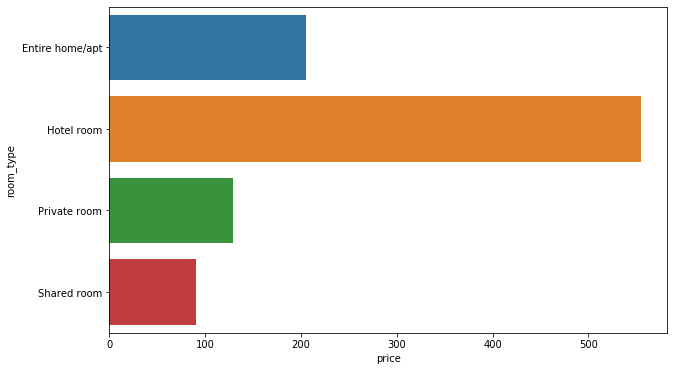

In [17]:
room_df=df_combined.groupby('room_type',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(room_df['price'], room_df['room_type'])

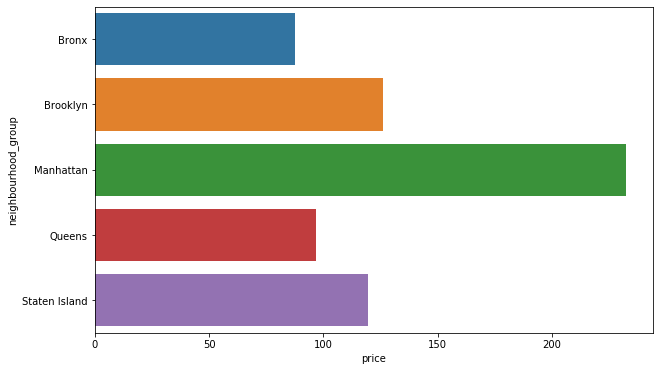

In [18]:
avg_df=df_combined.groupby('neighbourhood_group',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_df['price'], avg_df['neighbourhood_group'])

### Price stat

In [19]:
df_combined.price.describe()

count    22702.000000
mean       171.873007
std        540.298926
min          0.000000
25%         69.000000
50%        109.000000
75%        175.000000
max      25000.000000
Name: price, dtype: float64

In [29]:
print(f"the max price registerd is: {df_combined.price.max()}")
print(f"the min price registerd is: {df_combined.price.min()}")

the max price registerd is: 25000.0
the min price registerd is: 0.0


In [33]:
Price_df = df_combined.loc[(df_combined.price.max()) and (df_combined.price.min())]
Price_df

listing_id                                                                     2060
name                                                                     Modern NYC
host_id                                                                        2259
host_name                                                                     Jenny
neighbourhood                                                    Washington Heights
neighbourhood_group                                                       Manhattan
latitude                                                                    40.8572
longitude                                                                  -73.9379
room_type                                                              Private room
price                                                                           100
minimum_nights                                                                    1
number_of_reviews                                                           

In [20]:
Bronx_df = df_combined.loc[(df_combined['neighbourhood_group']== 'Bronx') & (df_combined['room_type']=='Hotel room')]
Bronx_df.count()

listing_id                        0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
comments                          0
dtype: int64

In [21]:
StatenIsland_df = df_combined.loc[(df_combined['neighbourhood_group']== 'Staten Island') & (df_combined['room_type']=='Hotel room')]
StatenIsland_df.count()

listing_id                        0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
comments                          0
dtype: int64

### Correlation

Before doing correlation we chnage the category in neighbourhood_group into int as follows

In [22]:
df_corr = df_combined.replace(to_replace=['Bronx', 'Staten Island', 'Queens', 'Brooklyn','Manhattan'], value=[0, 1, 2, 3, 4 ])
df_corr['price'] = df_combined['price']
df_corr.corr()

listing_id   host_id  neighbourhood_group  \
listing_id                        1.000000  0.599074            -0.015385   
host_id                           0.599074  1.000000            -0.063072   
neighbourhood_group              -0.015385 -0.063072             1.000000   
latitude                         -0.012815  0.002857             0.211141   
longitude                         0.037929  0.106448            -0.565876   
price                             0.053230  0.073836             0.093710   
minimum_nights                    0.027894  0.004064             0.070249   
number_of_reviews                -0.298583 -0.137689            -0.061236   
reviews_per_month                 0.187552  0.239755            -0.082661   
calculated_host_listings_count    0.113826  0.095235             0.130155   
availability_365                  0.169691  0.223474            -0.043002   

                                latitude  longitude     price  minimum_nights  \
listing_id                     -0.012815   0.037929  0.053230        0.027894   
host_id                         0.002857   0.106448  0.073836        0.004064   
neighbourhood_group             0.211141  -0.565876  0.093710        0.070249   
latitude                        1.000000   0.068464  0.028862        0.030889   
longitude                       0.068464   1.000000 -0.088558       -0.069392   
price                           0.028862  -0.088558  1.000000        0.000657   
minimum_nights                  0.030889  -0.069392  0.000657        1.000000   
number_of_reviews              -0.018664   0.067169 -0.032755       -0.091367   
reviews_per_month              -0.026194   0.121297  0.017861       -0.124197   
calculated_host_listings_count  0.022712  -0.132504  0.008804        0.143720   
availability_365               -0.012152   0.050607  0.056365        0.161415   

                                number_of_reviews  reviews_per_month  \
listing_id                              -0.298583           0.187552   
host_id                                 -0.137689           0.239755   
neighbourhood_group                     -0.061236          -0.082661   
latitude                                -0.018664          -0.026194   
longitude                                0.067169           0.121297   
price                                   -0.032755           0.017861   
minimum_nights                          -0.091367          -0.124197   
number_of_reviews                        1.000000           0.660144   
reviews_per_month                        0.660144           1.000000   
calculated_host_listings_count          -0.081275          -0.043029   
availability_365                         0.186317           0.228577   

                                calculated_host_listings_count  \
listing_id                                            0.113826   
host_id                                               0.095235   
neighbourhood_group                                   0.130155   
latitude                                              0.022712   
longitude                                            -0.132504   
price                                                 0.008804   
minimum_nights                                        0.143720   
number_of_reviews                                    -0.081275   
reviews_per_month                                    -0.043029   
calculated_host_listings_count                        1.000000   
availability_365                                      0.236877   

                                availability_365  
listing_id                              0.169691  
host_id                                 0.223474  
neighbourhood_group                    -0.043002  
latitude                               -0.012152  
longitude                               0.050607  
price                                   0.056365  
minimum_nights                          0.161415  
number_of_reviews                       0.186317  
reviews_per_month

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'comments'],
      dtype='object')

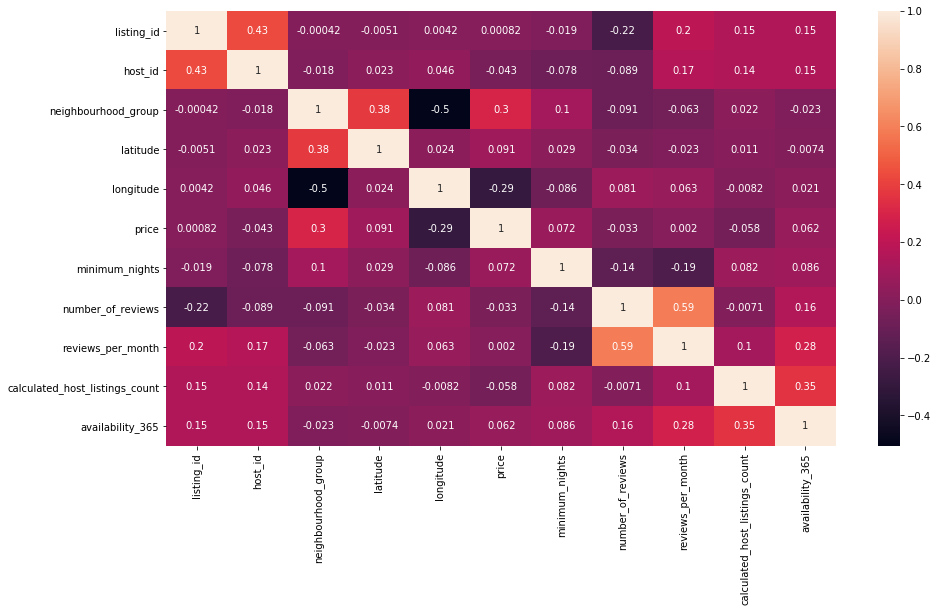

In [23]:
corr = df_corr.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_corr.columns

In [24]:
df_combined.to_csv("df_final.csv")


# NYC Airbnb Review


Create a function that will analyze the "comment" column and calculate a sentiment value. Make a new column in the dataframe that will contain the sentiment value for each review.





### Sentiment Analysis

In order to understand how people feel about something, we need to do sentiment analysis on text data that contains their opinion.

The VADER Sentiment Intensity Analyzer returns a score between -1 to 1. Scores closer to -1 have a negative sentiment, scores closer to 1 have a positive sentiment, and scores around 0 are considered neutral.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
from nltk.corpus import names  

from string import punctuation

import matplotlib.pyplot as plt

In [2]:
#initilize function to do sentiment analysis
sid = SentimentIntensityAnalyzer()

In [3]:
#list of english stopwords
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
import pandas as pd

#load the data from the Reviews.csv file
# reviews for Girl on the train
filepath = "datasets/df_text.csv"
df = pd.read_csv(filepath) #this file is encoded differently

df.head()

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   
3           3        5099   793620    Yvette  Washington Heights  40.84468   
4           4        5178  1423613    Arthur  Washington Heights  40.85774   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   
3  -73.94303     Private room   $75.00               2                 40   
4  -73.92901  Entire home/apt   $65.00              85                 21   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   
3  2020-02-01               0.38               272   
4  2020-03-03               0.36               230   

                                            comments neighbourhood_group  
0  very nice neighborhood,close enough to "A" tra...           Manhattan  
1  Spacious, near public transportation, good pri...           Manhattan  
2  A well located spot in a quieter neighbourhood...           Manhattan  
3  Tinas Appartement war so wie beschrieben, es i...           Manhattan  
4  My first experience using airbnb was great! Th...           Manhattan

In [5]:
df.isnull().sum()

Unnamed: 0                0
listing_id                0
host_id                   0
host_name                 4
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
last_review            4691
reviews_per_month      4691
availability_365          0
comments                  6
neighbourhood_group       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0             0
listing_id             0
host_id                0
host_name              0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
availability_365       0
comments               0
neighbourhood_group    0
dtype: int64

In [8]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentiment(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    #tknz_review is alist
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    #empty list to hold "cleaned" tokens
    clean_tokens = []
    
    #remove filler words
    for token in tknz_review:
        if token not in eng_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words
    clean_review = ' '.join(clean_tokens)
    
    #get the polarity scores dictionary
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity from the "compound" key in the sid_rev dictionary
    r_comp = sid_rev['compound']
    
    #return the sentiment value
    return r_comp

In [9]:
#create a new column to hold sentiment value from function
df['review_sentiment'] = df['comments'].apply(reviewSentiment)

In [10]:
#erify sentiment values in new column
df.head()

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   
3           3        5099   793620    Yvette  Washington Heights  40.84468   
4           4        5178  1423613    Arthur  Washington Heights  40.85774   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   
3  -73.94303     Private room   $75.00               2                 40   
4  -73.92901  Entire home/apt   $65.00              85                 21   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   
3  2020-02-01               0.38               272   
4  2020-03-03               0.36               230   

                                            comments neighbourhood_group  \
0  very nice neighborhood,close enough to "A" tra...           Manhattan   
1  Spacious, near public transportation, good pri...           Manhattan   
2  A well located spot in a quieter neighbourhood...           Manhattan   
3  Tinas Appartement war so wie beschrieben, es i...           Manhattan   
4  My first experience using airbnb was great! Th...           Manhattan   

   review_sentiment  
0            0.9552  
1            0.2960  
2            0.8689  
3           -0.9761  
4            0.9217

In [11]:
df.dtypes

Unnamed: 0               int64
listing_id               int64
host_id                  int64
host_name               object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                   object
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
availability_365         int64
comments                object
neighbourhood_group     object
review_sentiment       float64
dtype: object

In [12]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    else:
        return "neutral"

In [13]:
#create a new column to hold sentiment category
df['sentiment_category'] = df['review_sentiment'].apply(sentimentCategory)

In [14]:
df.head(3)

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   

                                            comments neighbourhood_group  \
0  very nice neighborhood,close enough to "A" tra...           Manhattan   
1  Spacious, near public transportation, good pri...           Manhattan   
2  A well located spot in a quieter neighbourhood...           Manhattan   

   review_sentiment sentiment_category  
0            0.9552           positive  
1            0.2960           positive  
2            0.8689           positive

In [15]:
#compare frequency of positive, negative, and neutral reviews
df['sentiment_category'].value_counts()

positive    16011
neutral      1547
negative      445
Name: sentiment_category, dtype: int64

In [16]:
df[df['sentiment_category']== 'positive'].head(3)

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   

                                            comments neighbourhood_group  \
0  very nice neighborhood,close enough to "A" tra...           Manhattan   
1  Spacious, near public transportation, good pri...           Manhattan   
2  A well located spot in a quieter neighbourhood...           Manhattan   

   review_sentiment sentiment_category  
0            0.9552           positive  
1            0.2960           positive  
2            0.8689           positive

In [17]:
df[df['sentiment_category']== 'negative'].head(10)

Unnamed: 0  listing_id    host_id    host_name       neighbourhood  \
3             3        5099     793620       Yvette  Washington Heights   
204         204       54508   75973505     Jeanette  Washington Heights   
217         217       56859   59111337     Meredith  Washington Heights   
278         278       66718   25914748          Amy  Washington Heights   
307         307       94477  233732841          Ori  Washington Heights   
332         332      106363   27973267          Gus  Washington Heights   
429         429        3831     116599         Sahr        Clinton Hill   
560         560       29455    1524765  Christopher        Clinton Hill   
604         604       45910   68302204       Samuel        Clinton Hill   
686         686       66741     319077        Shell        Clinton Hill   

     latitude  longitude        room_type    price  minimum_nights  \
3    40.84468  -73.94303     Private room   $75.00               2   
204  40.86027  -73.92640     Private room   $40.00               3   
217  40.85029  -73.93602     Private room   $42.00               2   
278  40.85094  -73.94035  Entire home/apt   $90.00               3   
307  40.83495  -73.94682  Entire home/apt  $150.00               2   
332  40.85115  -73.93223     Private room  $150.00               2   
429  40.68513  -73.96648     Private room  $165.00               4   
560  40.68701  -73.96174  Entire home/apt  $140.00               3   
604  40.68076  -73.95751     Private room  $100.00               5   
686  40.68550  -73.96112     Private room  $235.00              30   

     number_of_reviews last_review  reviews_per_month  availability_365  \
3                   40  2020-02-01               0.38               272   
204                 28  2020-03-12               1.72               339   
217                  3  2018-08-22               0.09                 0   
278                  3  2019-09-02               0.15                17   
307                  1  2020-03-01               0.71               364   
332                 27  2020-03-17               2.47               136   
429                 13  2019-12-10               0.12               364   
560                  4  2016-08-07               0.09                 0   
604                  4  2018-04-22               0.11                88   
686                  2  2018-11-18               0.11               353   

                                              comments neighbourhood_group  \
3    Tinas Appartement war so wie beschrieben, es i...           Manhattan   
204  Es war eine sehr schöne Entdeckungsfahrt  mit ...           Manhattan   
217  La chambre (conforme aux photos) était propre ...           Manhattan   
278  Hemos pasado 9 días en casa de Hennig muy a gu...           Manhattan   
307  The only regret you’ll have is not being able ...           Manhattan   
332  In Alicia's Apartment ist ein künstlerischer G...           Manhattan   
429  Die Wohnung liegt zentral in Brooklyn. Mit Bus...            Brooklyn   
560  Die U Bahn ist nicht weit entfernt, Einkaufsmö...            Brooklyn   
604  This place is big enough for 9 people, but it ...            Brooklyn   
686  Wir waren Anfang Dezember 2018 in diesem tolle...            Brooklyn   

     review_sentiment sentiment_category  
3             -0.9761           negative  
204           -0.9661           negative  
217           -0.2500           negative  
278           -0.2960           negative  
307           -0.4215           negative  
332           -0.9750           negative  
429           -0.8316           negative  
560           -0.8481           negative  
604           -0.6745           negative  
686           -0.9618           negative

### Positive

In [18]:
df['comments'].iloc[0]

'very nice neighborhood,close enough to "A" train,\r\ncomfortable bed and clean home over all.\r\nJennys cat is very sweet and fun to play with, but wants to sleep in bed with you and won\'t shut up unless such privilages are granted . . .\r\nMeyow meyow meyow.'

In [19]:
df['review_sentiment'].iloc[0]

0.9552

In [20]:
df['sentiment_category'].iloc[0]

'positive'

### Nagative

In [21]:
df[df['listing_id']== 94477]

Unnamed: 0  listing_id    host_id      host_name       neighbourhood  \
305           305       94477   24973324        Matthew  Washington Heights   
306           306       94477   17174170         Angela  Washington Heights   
307           307       94477  233732841            Ori  Washington Heights   
1415         1415       94477   10239868       Kiersten     Upper West Side   
1416         1416       94477  244438661            Bel     Upper West Side   
...           ...         ...        ...            ...                 ...   
22346       22346       94477  131995652          Henry             Tremont   
22347       22347       94477  207640201          Denny             Tremont   
22508       22508       94477  228141767          Angel         Kingsbridge   
22509       22509       94477   32625342         Bianca         Kingsbridge   
22530       22530       94477     173009  Scott And Bea           Stapleton   

       latitude  longitude        room_type    price  minimum_nights  \
305    40.85355  -73.93232  Entire home/apt  $125.00               2   
306    40.85197  -73.92853  Entire home/apt   $74.00               1   
307    40.83495  -73.94682  Entire home/apt  $150.00               2   
1415   40.78106  -73.98105  Entire home/apt  $215.00               4   
1416   40.79660  -73.97428     Private room   $77.00               3   
...         ...        ...              ...      ...             ...   
22346  40.84994  -73.90660  Entire home/apt  $148.00               3   
22347  40.84740  -73.89612      Shared room   $50.00               1   
22508  40.88344  -73.90301     Private room   $45.00               1   
22509  40.88316  -73.90586     Private room   $35.00               4   
22530  40.63285  -74.07780  Entire home/apt  $125.00               2   

       number_of_reviews last_review  reviews_per_month  availability_365  \
305                    6  2019-10-21               0.43                87   
306                    4  2019-03-24               0.30                 0   
307                    1  2020-03-01               0.71               364   
1415                   4  2020-01-01               0.29                98   
1416                   3  2020-03-06               0.25                56   
...                  ...         ...                ...               ...   
22346                 12  2019-10-28               0.90               312   
22347                  8  2019-08-25               0.58               139   
22508                 27  2019-09-27               1.91               314   
22509                 13  2020-01-03               0.95                 0   
22530                 30  2020-03-15               2.43               360   

                                                comments neighbourhood_group  \
305    Gran anfitrión, muy amable. El departamento es...           Manhattan   
306    当日はあいにくの雨でしたが､薄暗い本堂の中で雨音をBGMに坐禅を組むというｱｼﾞのある体験と...           Manhattan   
307    The only regret you’ll have is not being able ...           Manhattan   
1415   What a wonderful apartment, location, experien...           Manhattan   
1416   Amazing experience with a monk in an old templ...           Manhattan   
...                                                  ...                 ...   
22346  Vernon was very helpful and welcomed us with o...               Bronx   
22347  Die Wohnung war für uns vier Städtebesucher id...               Bronx   
22508  We had a fantastic time in NY and Vernon's pla...               Bronx   
22509  Great place! Exactly as the pictures show and ...               Bronx   
22530  Very clean, great place! Close to subway stati...       Staten Island   

       review_sentiment sentiment_category  
305              0.0000            neutral  
306              0.0000            neutral  
307             -0.4215           negative  
1415             0.9843           positive  
1416             0.8176           positive  
...                 ...              

In [22]:
df['review_sentiment'].iloc[4]

0.9217

In [23]:
df['sentiment_category'].iloc[4]

'positive'

### Contradictory?

In [24]:
df['comments'].iloc[24]

"We had a great stay at Laurie's place - it was perfect for all our needs. Park Slope is a great neighborhood, nice and quiet too, and Laurie's house is close to 3 very convenient subway lines. Laurie was very helpful in telling us where the best local places are for pizza, bagels etc. Not that we ever actually went out for bagels in the end - Laurie had the most amazing bagels, cream cheese and orange juice I have ever tasted!! "

In [25]:
df['review_sentiment'].iloc[24]

0.9794

In [26]:
df['sentiment_category'].iloc[24]

'positive'

# Visualizing Sentiments

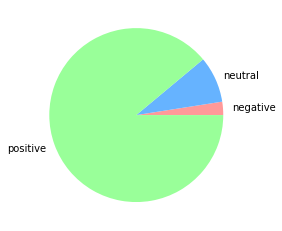

In [27]:
%matplotlib inline
#add colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['#ff9999','#66b3ff','#99ff99']
df.groupby(['sentiment_category']).size().plot.pie(colors = colors,label="")

To get clear picture of the neutral and negative catagories let us make a histogram plot. To do so we need to convert the categories into numbers uing the following function. Where we assigned positive =1, negative =-1, and neutral = 0.

In [28]:
#create a function to assign a number to category of the sentiments
def sentimentCategory_num(sent_num):
    if sent_num == "positive":
        return 1
    if sent_num == "negative":
        return -1
    else:
        return 0

In [29]:
#create a new column to hold sentiment category numbers
df['sentiment_category_num'] = df['sentiment_category'].apply(sentimentCategory_num)

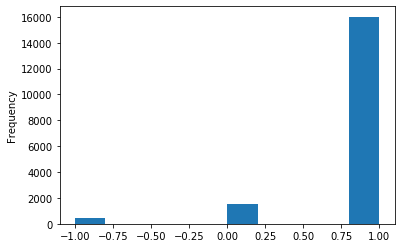

In [30]:
df['sentiment_category_num'].plot(kind='hist')

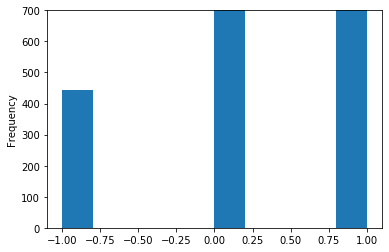

In [31]:
# zoom_in plots
df['sentiment_category_num'].plot(kind='hist', ylim=(0,700))

Overall, it seems that most customers feel positive.

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def make_wordcloud(words):

    text = ""
    for word in words:
        text = text + " " + word

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords,colormap="magma",width=1920, height=1080,max_font_size=200, max_words=200, background_color="white").generate(text)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation="gaussian")
    plt.axis("off")
    plt.show()

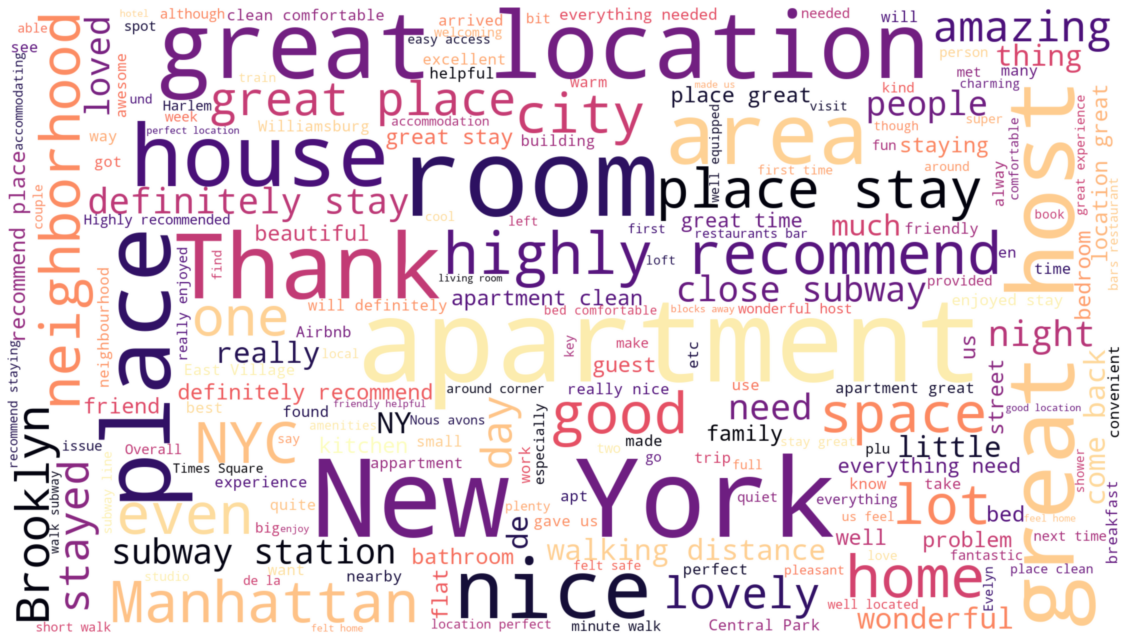

In [33]:
comments = df['comments']
make_wordcloud(comments)

# Geolocation of NYC Airbnb

Geospatial information is data that is referenced by spatial or geographic coordinates. The data that we will be working with in this project is vector data - features that are represented by points, lines, and polygons. <br>
 - **Points** are defined by a pair of (x,y) coordinates. They usually represent locations, place names, and other objects on the ground.
 - **Lines** are the connection between two points. They can have properties such as length, direction, flow, etc.
 - **Polygons** are a series of lines connected together to form a shape. They can have properties such as area, perimeters, and centroids. 
 
In this notebook, we will show the plots of airbnb hostings on NY map and see how it looks like, the geodata file we need is downloaded from the website given at the [NYCAirbnb](http://insideairbnb.com/get-the-data.html).

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

### NYC Airbnb sites


In [2]:
#load meteorite data collected from NASA Open Data API
NYC_df = pd.read_csv("datasets/df_text.csv")
NYC_df.head()

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   
3           3        5099   793620    Yvette  Washington Heights  40.84468   
4           4        5178  1423613    Arthur  Washington Heights  40.85774   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   
3  -73.94303     Private room   $75.00               2                 40   
4  -73.92901  Entire home/apt   $65.00              85                 21   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   
3  2020-02-01               0.38               272   
4  2020-03-03               0.36               230   

                                            comments neighbourhood_group  
0  very nice neighborhood,close enough to "A" tra...           Manhattan  
1  Spacious, near public transportation, good pri...           Manhattan  
2  A well located spot in a quieter neighbourhood...           Manhattan  
3  Tinas Appartement war so wie beschrieben, es i...           Manhattan  
4  My first experience using airbnb was great! Th...           Manhattan

In [3]:
#data type of each column
NYC_df.dtypes

Unnamed: 0               int64
listing_id               int64
host_id                  int64
host_name               object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                   object
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
availability_365         int64
comments                object
neighbourhood_group     object
dtype: object

In [4]:
#see columns with null values
NYC_df.count()

Unnamed: 0             22702
listing_id             22702
host_id                22702
host_name              22698
neighbourhood          22702
latitude               22702
longitude              22702
room_type              22702
price                  22702
minimum_nights         22702
number_of_reviews      22702
last_review            18011
reviews_per_month      18011
availability_365       22702
comments               22696
neighbourhood_group    22702
dtype: int64

In [5]:
#only include rows with non-null latitudes (which means longitude is also not null) and non-null mass
NYC_df = NYC_df.loc[(NYC_df['latitude'].notnull()) & NYC_df['room_type'].notnull()]
NYC_df.count()

Unnamed: 0             22702
listing_id             22702
host_id                22702
host_name              22698
neighbourhood          22702
latitude               22702
longitude              22702
room_type              22702
price                  22702
minimum_nights         22702
number_of_reviews      22702
last_review            18011
reviews_per_month      18011
availability_365       22702
comments               22696
neighbourhood_group    22702
dtype: int64

In [6]:
#make a new column to hold the longitude & latitude as a list
NYC_df['coordinates'] = list(NYC_df[['longitude', 'latitude']].values)

In [7]:
#see new coordinates column
NYC_df.head()

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   
3           3        5099   793620    Yvette  Washington Heights  40.84468   
4           4        5178  1423613    Arthur  Washington Heights  40.85774   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   
3  -73.94303     Private room   $75.00               2                 40   
4  -73.92901  Entire home/apt   $65.00              85                 21   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   
3  2020-02-01               0.38               272   
4  2020-03-03               0.36               230   

                                            comments neighbourhood_group  \
0  very nice neighborhood,close enough to "A" tra...           Manhattan   
1  Spacious, near public transportation, good pri...           Manhattan   
2  A well located spot in a quieter neighbourhood...           Manhattan   
3  Tinas Appartement war so wie beschrieben, es i...           Manhattan   
4  My first experience using airbnb was great! Th...           Manhattan   

                      coordinates  
0            [-73.9379, 40.85722]  
1           [-73.93951, 40.83403]  
2           [-73.93361, 40.85295]  
3  [-73.94303000000002, 40.84468]  
4  [-73.92900999999998, 40.85774]

In [8]:
#list values in coordinates column is classified as object type
NYC_df['coordinates'].dtypes

dtype('O')

In [9]:
#convert the coordinates to a geolocation type
NYC_df['coordinates'] = NYC_df['coordinates'].apply(Point)

In [10]:
#coordinates column now has POINT next to each coordinate pair value
NYC_df.head()

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   
3           3        5099   793620    Yvette  Washington Heights  40.84468   
4           4        5178  1423613    Arthur  Washington Heights  40.85774   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   
3  -73.94303     Private room   $75.00               2                 40   
4  -73.92901  Entire home/apt   $65.00              85                 21   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   
3  2020-02-01               0.38               272   
4  2020-03-03               0.36               230   

                                            comments neighbourhood_group  \
0  very nice neighborhood,close enough to "A" tra...           Manhattan   
1  Spacious, near public transportation, good pri...           Manhattan   
2  A well located spot in a quieter neighbourhood...           Manhattan   
3  Tinas Appartement war so wie beschrieben, es i...           Manhattan   
4  My first experience using airbnb was great! Th...           Manhattan   

                           coordinates  
0            POINT (-73.9379 40.85722)  
1           POINT (-73.93951 40.83403)  
2           POINT (-73.93361 40.85295)  
3  POINT (-73.94303000000002 40.84468)  
4  POINT (-73.92900999999998 40.85774)

In [11]:
#coordinates column with geolocation data is just a regular pandas Series type
type(NYC_df['coordinates'])

pandas.core.series.Series

In [12]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_NYC = gpd.GeoDataFrame(NYC_df, geometry='coordinates')

In [13]:
#geo-dataframe looks the same as regular dataframe
geo_NYC.head()

Unnamed: 0  listing_id  host_id host_name       neighbourhood  latitude  \
0           0        2060     2259     Jenny  Washington Heights  40.85722   
1           1        3831   361855      Kurt  Washington Heights  40.83403   
2           2        3831   523218   Giorgio  Washington Heights  40.85295   
3           3        5099   793620    Yvette  Washington Heights  40.84468   
4           4        5178  1423613    Arthur  Washington Heights  40.85774   

   longitude        room_type    price  minimum_nights  number_of_reviews  \
0  -73.93790     Private room  $100.00               1                  1   
1  -73.93951  Entire home/apt  $265.00               3                 35   
2  -73.93361     Private room   $67.00               2                151   
3  -73.94303     Private room   $75.00               2                 40   
4  -73.92901  Entire home/apt   $65.00              85                 21   

  last_review  reviews_per_month  availability_365  \
0  2008-09-22               0.01               365   
1  2020-01-27               0.42               329   
2  2020-02-18               1.39               298   
3  2020-02-01               0.38               272   
4  2020-03-03               0.36               230   

                                            comments neighbourhood_group  \
0  very nice neighborhood,close enough to "A" tra...           Manhattan   
1  Spacious, near public transportation, good pri...           Manhattan   
2  A well located spot in a quieter neighbourhood...           Manhattan   
3  Tinas Appartement war so wie beschrieben, es i...           Manhattan   
4  My first experience using airbnb was great! Th...           Manhattan   

                  coordinates  
0  POINT (-73.93790 40.85722)  
1  POINT (-73.93951 40.83403)  
2  POINT (-73.93361 40.85295)  
3  POINT (-73.94303 40.84468)  
4  POINT (-73.92901 40.85774)

In [14]:
#verify coordinates column is geolocation data type
type(geo_NYC['coordinates'])

geopandas.geoseries.GeoSeries

In [15]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "datasets/neighbourhoods.geojson"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

neighbourhood neighbourhood_group  \
0         Bayswater              Queens   
1          Allerton               Bronx   
2       City Island               Bronx   
3  Ditmars Steinway              Queens   
4        Ozone Park              Queens   

                                            geometry  
0  MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...  
1  MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...  
2  MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...  
3  MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ...  
4  MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ...

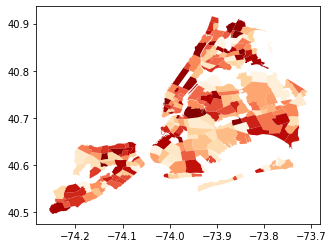

In [16]:
#map graph
map_df.plot(cmap='OrRd')

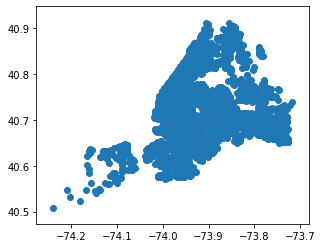

In [17]:
#plot the coordinates (no map)
geo_NYC.plot()

Text(0.5, 1, 'NYC Airbnb sites')

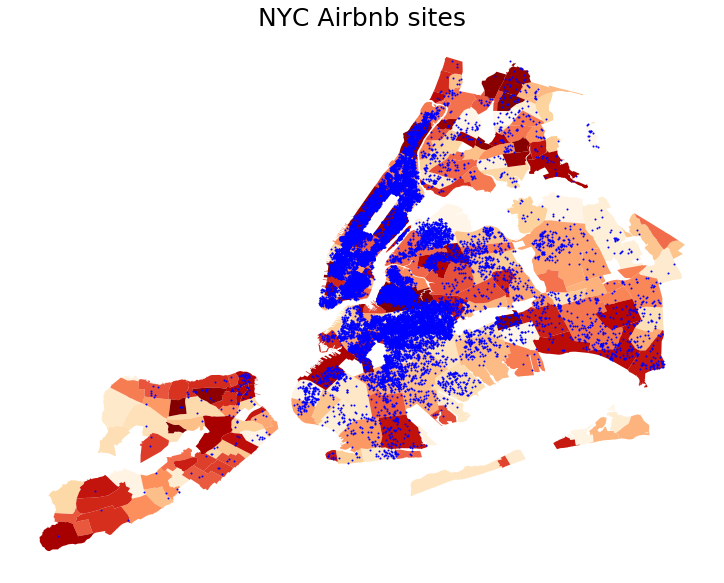

In [18]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax,cmap='OrRd')

#plot coordinates on top of map graph
geo_NYC.plot(ax=basemap, color='blue', marker=".", markersize=4)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("NYC Airbnb sites", fontsize=25, fontweight=3)

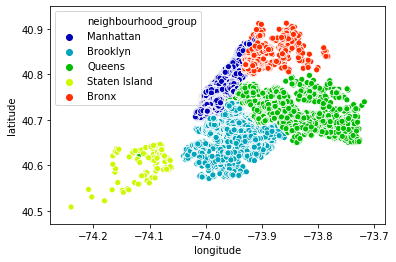

In [19]:
sns.scatterplot(NYC_df.longitude,NYC_df.latitude,hue=NYC_df.neighbourhood_group,palette='nipy_spectral')